In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import data, filters, segmentation, measure, morphology, color

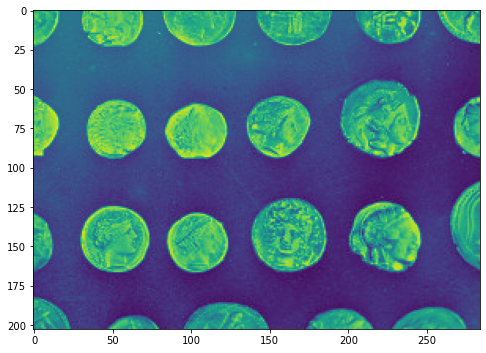

In [11]:
image = data.coins()[50:-50, 50:-50]
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(image)

In [13]:
image.shape

(203, 284)

In [15]:
thresh =filters.threshold_otsu(image) #阈值分割
bw =morphology.closing(image > thresh, morphology.square(3)) #闭运算
print('thresh:',thresh,' bw:', bw.shape)

thresh: 112  bw: (203, 284)


112

In [16]:
cleared = bw.copy()
cleared=segmentation.clear_border(cleared) 
print(cleared)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [8]:
cleared.dtype

dtype('bool')

In [5]:
label_image = measure.label(cleared)
borders = np.logical_xor(bw, cleared)
label_image[borders] = -1
image_label_overlay = color.label2rgb(label_image, image=image)

<ipython-input-5-3a7dec8872b4>:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay = color.label2rgb(label_image, image=image)


In [17]:
print(label_image)

[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]]


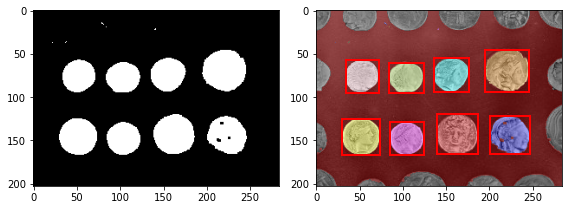

In [7]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 6))
ax0.imshow(cleared, plt.cm.gray)
ax1.imshow(image_label_overlay)
for region in measure.regionprops(label_image):
    if region.area < 100:
        continue
    
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    ax1.add_patch(rect)
fig.tight_layout()
plt.show()